In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [2]:
urls = ["/content/drive/MyDrive/GoogleColab/aleofb10.jpg"]  

In [3]:
imageDw = io.imread("/content/drive/MyDrive/GoogleColab/aleofb10.jpg")
imageDw_2 = cv.cvtColor(imageDw, cv.COLOR_BGR2GRAY)
cv.imwrite("/content/drive/MyDrive/GoogleColab/test.jpg",imageDw_2)

True

In [4]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

--2021-09-25 04:14:59--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2021-09-25 04:14:59 (19.8 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [5]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml

--2021-09-25 04:14:59--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188506 (184K) [text/plain]
Saving to: ‘haarcascade_smile.xml’

haarcascade_smile.x 100%[===================>] 184.09K  --.-KB/s    in 0.02s   

2021-09-25 04:15:00 (8.40 MB/s) - ‘haarcascade_smile.xml’ saved [188506/188506]



In [6]:
image_face = io.imread("/content/drive/MyDrive/GoogleColab/aleofb10.jpg") 
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade = cv.CascadeClassifier('haarcascade_smile.xml')

In [7]:
image_face = io.imread("/content/drive/MyDrive/GoogleColab/aleofb10.jpg")
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(image_face, 1.1 , 5)
smiles = face_cascade.detectMultiScale(image_face, 1.3 , 20 )
contadorface=0
contadorsmile=0
for (x,y,w,h) in faces:
     cv.rectangle(image_face,(x,y),(x+w,y+h),(255,0,0),2)
     contadorface+=1 
     for (x,y,w,h) in smiles:
       cv.rectangle(image_face, (x,y),(x+w,y+h),(0,255,0),2)
       contadorsmile+=1    
print("la cantidad de caras es:"+str(contadorface))
 
cv.imwrite("/content/drive/MyDrive/GoogleColab/test1.jpg",image_face)

la cantidad de caras es:1


True

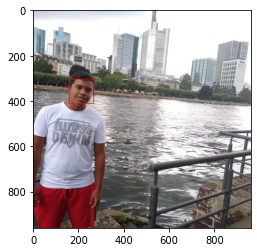

In [8]:
plt.imshow(image_face)

El programa identificó 1 rostros
El programa identificó 1 sonrisas


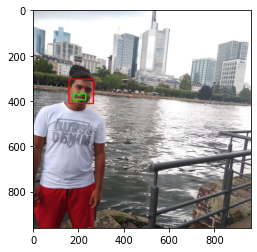

In [11]:
faces = face_cascade.detectMultiScale(image_face, scaleFactor= 1.1 , minNeighbors=8)
contF=0
for (x,y,w,h) in faces:
  cv.rectangle(image_face,(x,y),(x+w,y+h),(255,0,0),3)
  contS=0
  contF+=1
  sgris = image_face[y:y+h, x:x+w]
  scolor = image_face[y:y+h, x:x+w]
  face_cascadeSM = cv.CascadeClassifier('haarcascade_smile.xml')
  smiles = face_cascadeSM.detectMultiScale(sgris, scaleFactor= 1.1 ,minNeighbors=35 )
  for (x,y,w,h) in smiles:
    cv.rectangle(scolor, (x,y),(x+w,y+h),(0,255,0),3)
    contS+=1
plt.imshow(image_face)
print ("El programa identificó", str(contF),"rostros")
print ("El programa identificó", str(contS),"sonrisas")